In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib
import json
import os

matplotlib.rcParams.update({'font.size': 15})

%config InlineBackend.figure_format = 'retina'

In [2]:
def get_time(line):
    # returns milliseconds
    t = ":".join(line.split(":")[4:]).strip()
    hours, minutes, seconds = (["0", "0"] + t.split(":"))[-3:]
    hours = int(hours)
    minutes = int(minutes)
    seconds = float(seconds)
    ms = int(3600000 * hours + 60000 * minutes + 1000 * seconds)

    return ms
        
def get_mem(line):
    # returns bytes
    mem = int(line.split(':')[-1].strip())*1000
    return mem

def get_memtime(f):
    with open(f, 'r') as file:
        for idx, line in enumerate(file):
            if idx == 4:
                time = get_time(line)
            if idx == 9:
                mem = get_mem(line)
    return (mem, time)

In [94]:
d = []

f = "/home/sina/projects/atac/scATAK/data/10xPBMC/atac_x/time.kb.log"
nr = 466_894_746
m, t = get_memtime(f)
d.append(
    {
        "time": t,
        "mem": m,
        "nreads": nr,
        "tool": "snATAK",
        "dataset": "ATACX",
        "modality": "atac"
    }
)

f = "/home/sina/projects/atac/scATAK/data/10xPBMC/atac_x/time.cr.log"
nr = 466_894_746
m, t = get_memtime(f)
d.append(
    {
        "time": t,
        "mem": m,
        "nreads": nr,
        "tool": "cellranger-atac",
        "dataset": "ATACX",
        "modality": "atac"
    }
)

f = "/home/sina/projects/atac/scATAK/data/10xPBMC/mome_x/time.cr.log"
nr = 615_604_405
m, t = get_memtime(f)
d.append(
    {
        "time": t,
        "mem": m,
        "nreads": nr,
        "tool": "cellranger-arc",
        "dataset": "MOMEX",
        "modality": "atac"
    }
)

f = "/home/sina/projects/atac/scATAK/data/10xPBMC/mome_x/time.cr.log"
nr = 586_870_619
m, t = get_memtime(f)
d.append(
    {
        "time": t,
        "mem": m,
        "nreads": nr,
        "tool": "cellranger-arc",
        "dataset": "MOMEX",
        "modality": "gene"
    }
)

f = "/home/sina/projects/atac/scATAK/data/10xPBMC/mome_x/time.kb.atac.log"
nr = 615_604_405
m, t = get_memtime(f)
d.append(
    {
        "time": t,
        "mem": m,
        "nreads": nr,
        "tool": "snATAK",
        "dataset": "MOMEX",
        "modality": "atac"
    }
)

f = "/home/sina/projects/atac/scATAK/data/10xPBMC/mome_x/time.kb.gene.log"
nr = 586_870_619
m, t = get_memtime(f)
d.append(
    {
        "time": t,
        "mem": m,
        "nreads": nr,
        "tool": "snATAK",
        "dataset": "MOMEX",
        "modality": "gene"
    }
)

In [95]:
df = pd.DataFrame(d).sort_values("time")

In [97]:
df

,time,mem,nreads,tool,dataset,modality
5,1446270,8389836000,586870619,snATAK,MOMEX,gene
0,2151550,8390080000,466894746,snATAK,ATACX,atac
4,2602120,8390084000,615604405,snATAK,MOMEX,atac
2,43644000,18945968000,615604405,cellranger-arc,MOMEX,atac
3,43644000,18945968000,586870619,cellranger-arc,MOMEX,gene
1,140979000,14027836000,466894746,cellranger-atac,ATACX,atac


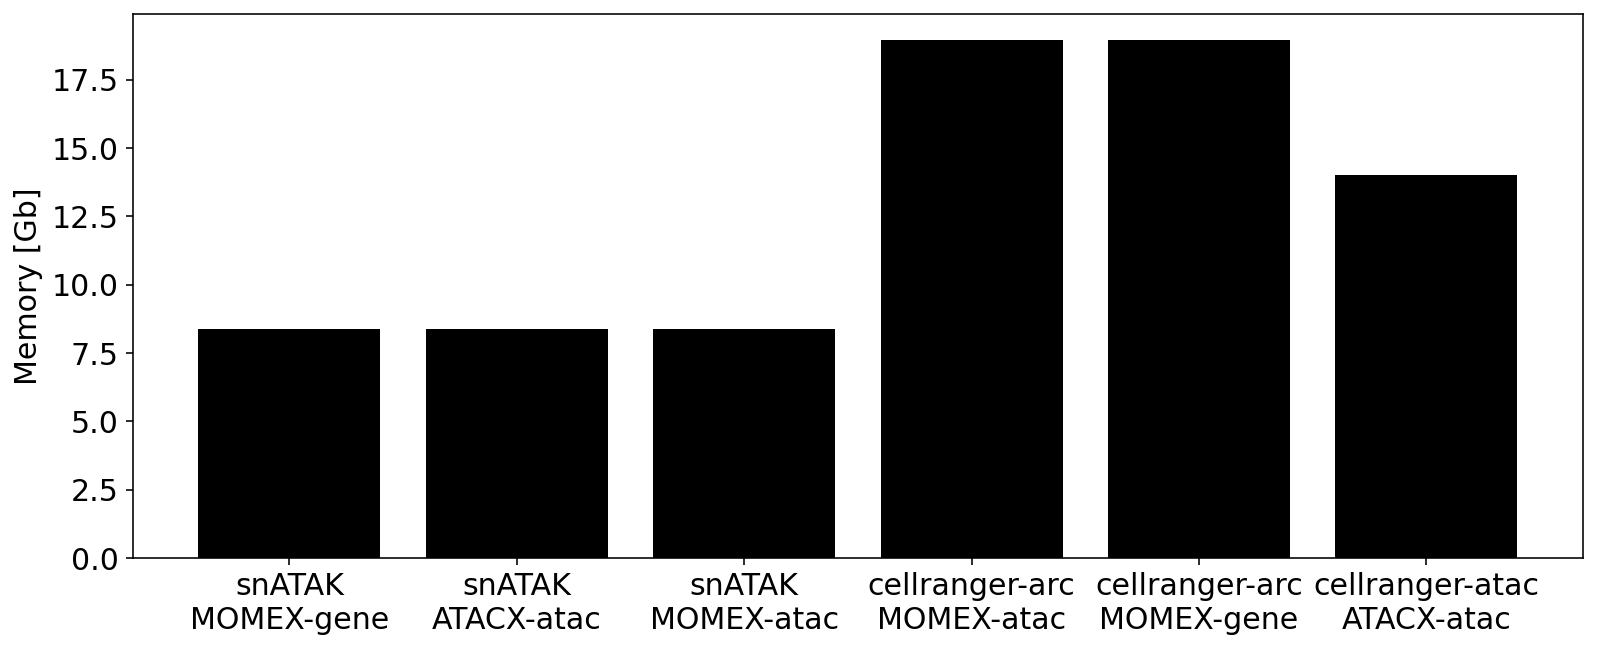

In [90]:
fig, ax = plt.subplots(figsize=(13, 5))

labels = [f"{i}\n{j}-{k}" for i, j, k in zip(df["tool"], df["dataset"], df["modality"])]

x = np.arange(len(labels))
y = df["mem"].values/10**9

ax.bar(x,y, color="k")

ax.set(**{
    "ylabel": "Memory [Gb]"
})

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha="center")
fig.show()

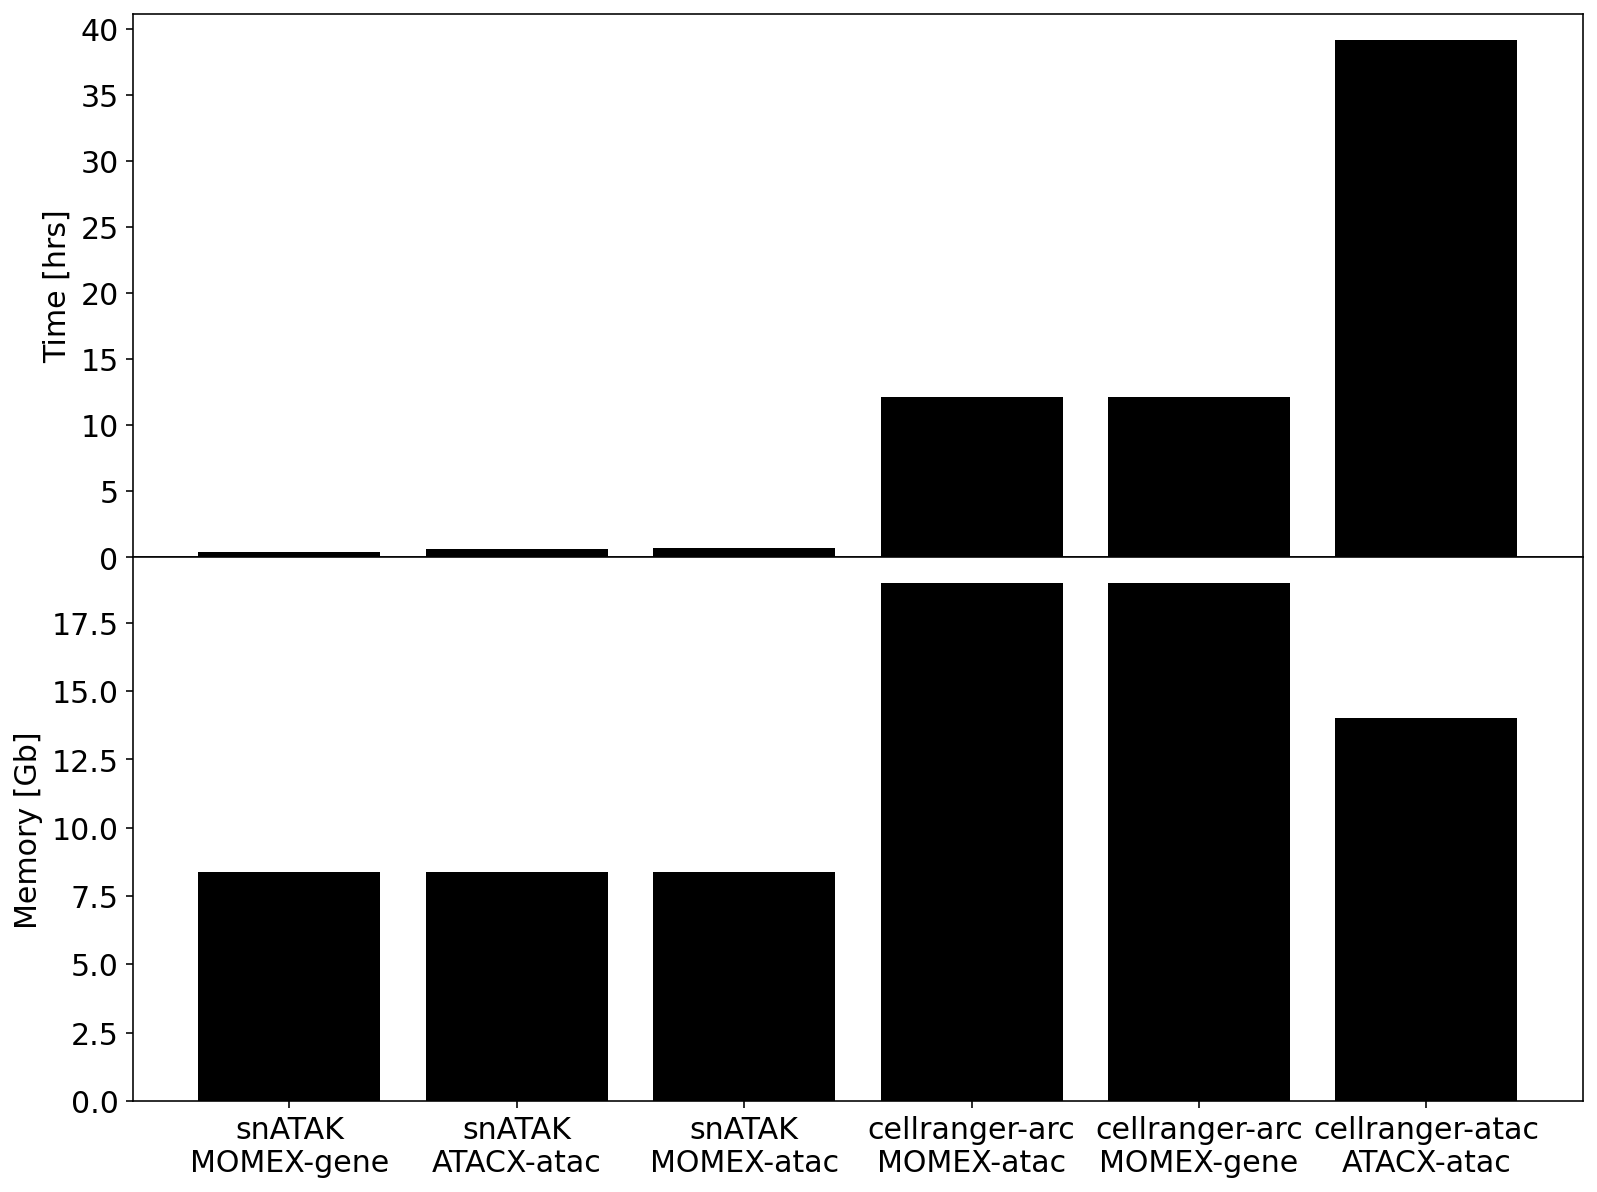

In [99]:
fig, axs = plt.subplots(figsize=(13, 10), nrows=2)
fig.subplots_adjust(hspace=0)

ax = axs[0]
labels = [f"" for i, j, k in zip(df["tool"], df["dataset"], df["modality"])]

x = np.arange(len(labels))
y = df["time"]/1000/60/60

ax.bar(x,y, color="k")
ax.set(**{
    "ylabel": "Time [hrs]"
})
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")

ax = axs[1]
labels = [f"{i}\n{j}-{k}" for i, j, k in zip(df["tool"], df["dataset"], df["modality"])]

x = np.arange(len(labels))
y = df["mem"].values/10**9

ax.bar(x,y, color="k")

ax.set(**{
    "ylabel": "Memory [Gb]"
})

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha="center")

fig.savefig("figures/memtime.png", dpi=300, bbox_inches="tight")
fig.show()

In [71]:
df["time_hr"] = df["time"]/1000/60/60
df["mem_gb"] = df["mem"]/1e9

In [73]:
df[["nreads", "tool", "dataset","modality","time_hr","mem_gb"]]

,nreads,tool,dataset,modality,time_hr,mem_gb
5,586870619,snATAK,10kPBMC-MOMEX,gene,0.372289,8.390084
0,466894746,snATAK,10kPBMC-ATACX,atac,0.597653,8.390080
4,615604405,snATAK,10kPBMC-MOMEX,atac,0.722811,8.390084
2,615604405,cellranger-arc,10kPBMC-MOMEX,atac,12.123333,18.945968
3,615604405,cellranger-arc,10kPBMC-MOMEX,gene,12.123333,18.945968
1,466894746,cellranger-atac,10kPBMC-ATACX,atac,39.160833,14.027836
